# Import Packages

In [99]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

## load data

In [100]:
data = sio.loadmat('FB_20141126.mat')

In [101]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

## Midprice, Microprice and Spread

In [102]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

In [103]:
midprice_mean = midprice.mean().round(4)
microprice_mean = microprice.mean().round(4)
avg_spread = (ask.max() - bid.min()).round(4)

print(f'mid-price: {midprice_mean}')
print(f'micro-price {microprice_mean}')
print(f'Spread: {spread}')

mid-price: 77.2374
micro-price 77.2372
Spread: [0.03 0.03 0.01 ... 0.01 0.01 0.01]


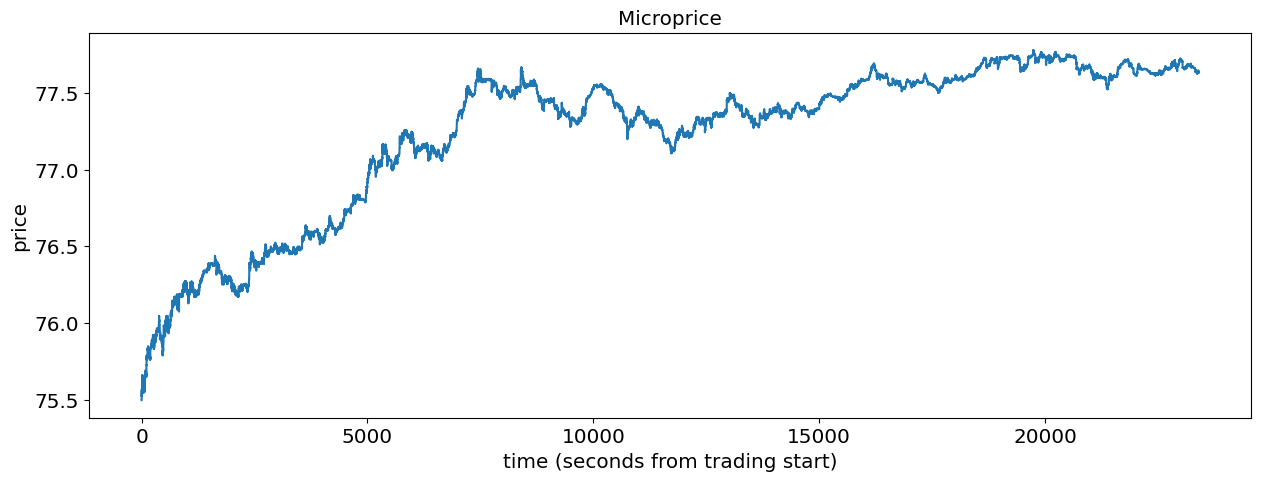

In [104]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

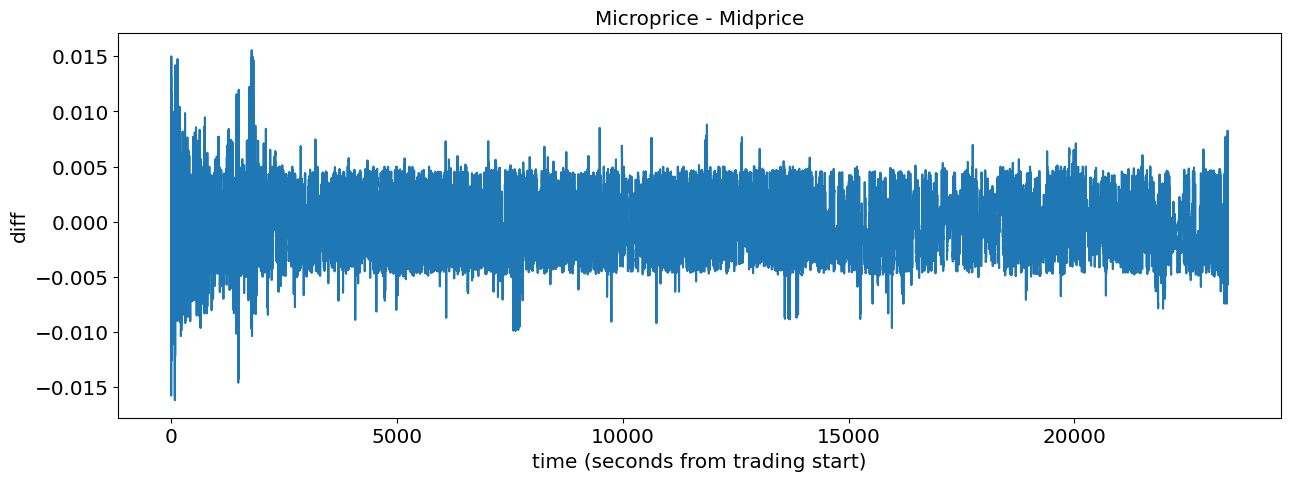

In [105]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

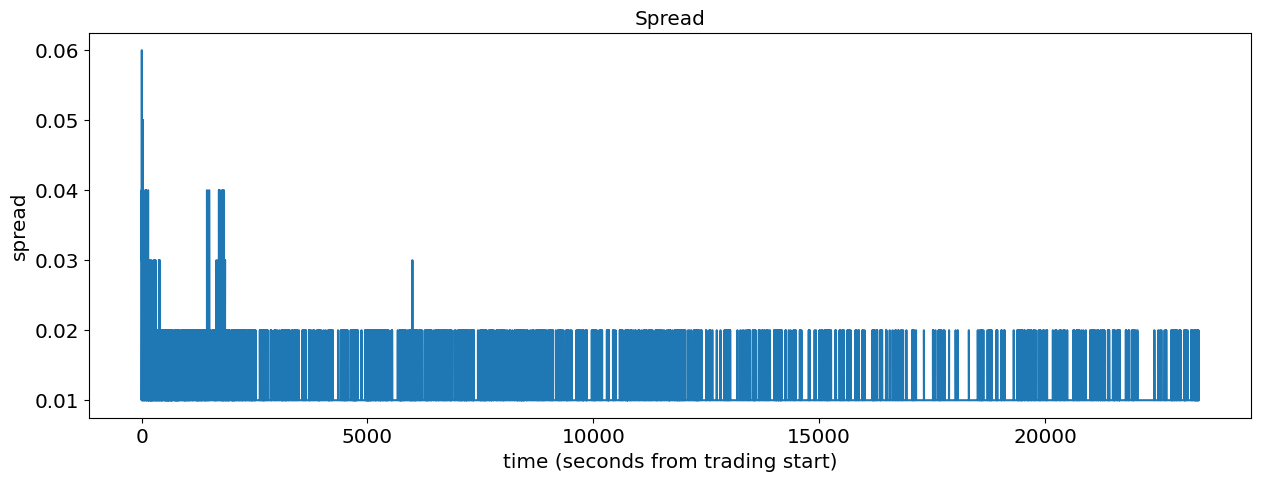

In [106]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

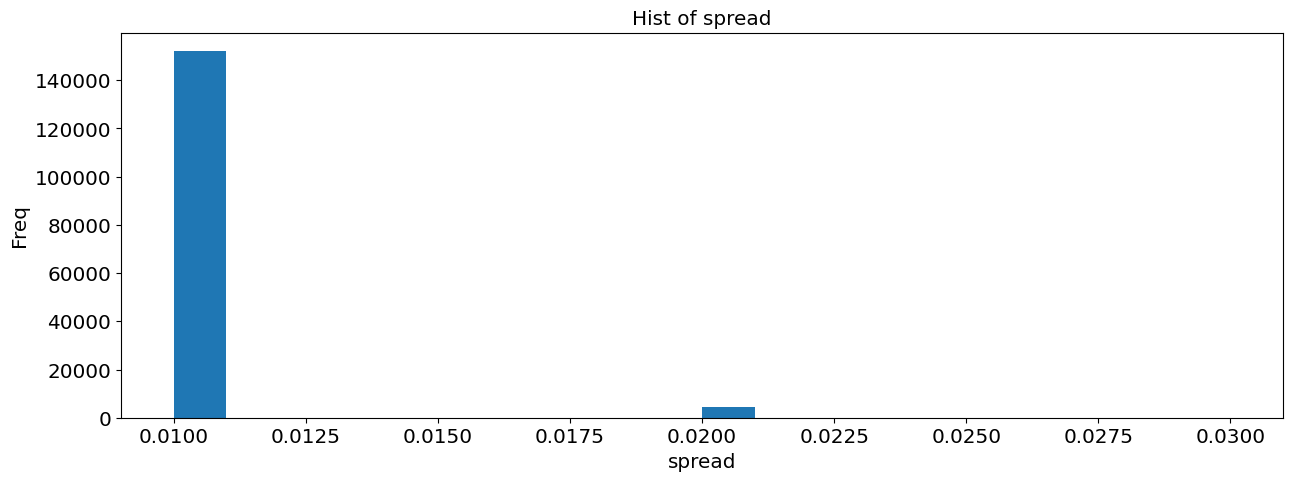

In [107]:
plt.hist(spread,bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("Hist of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

## Volume Imbalance

In [108]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

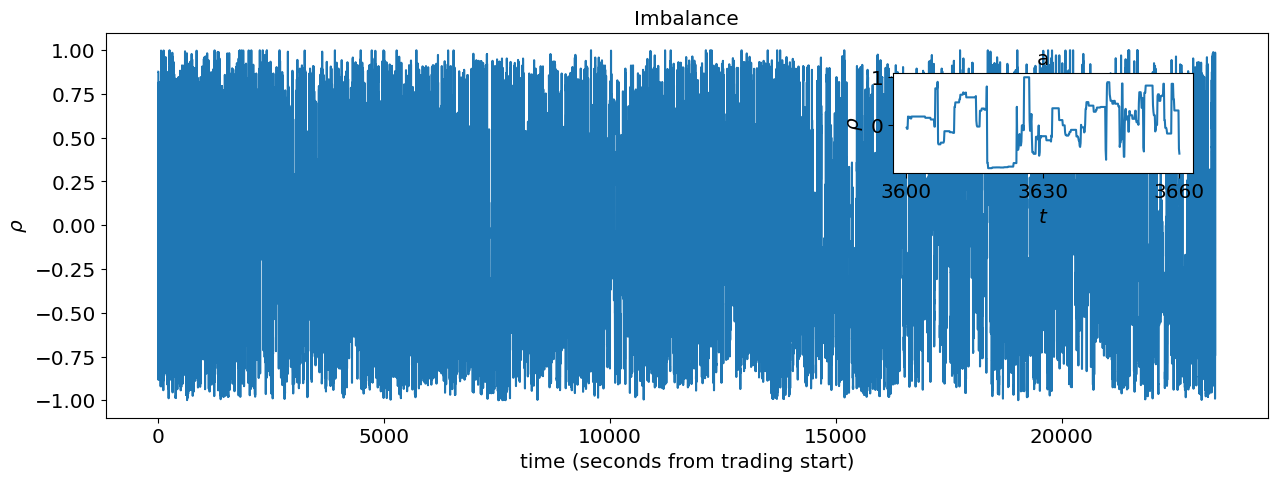

In [109]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

In [110]:
# Extract BuyVolume and SellVolume
buy_volume = data['LOB']['BuyVolume'][0][0].flatten()
sell_volume = data['LOB']['SellVolume'][0][0].flatten()

# Calculate Volume Imbalance
volume_imbalance = (buy_volume - sell_volume) / (buy_volume + sell_volume)

# Display the first few entries of volume imbalance to verify
volume_imbalance[:10]

print(volume_imbalance)

# Calculate the mean of the volume imbalance
mean_volume_imbalance = volume_imbalance.mean()

mean_volume_imbalance


[ 0.87683284  0.         -0.81818182 ... -0.79679959 -0.1354065
 -0.94173093]


-0.15807168319106474

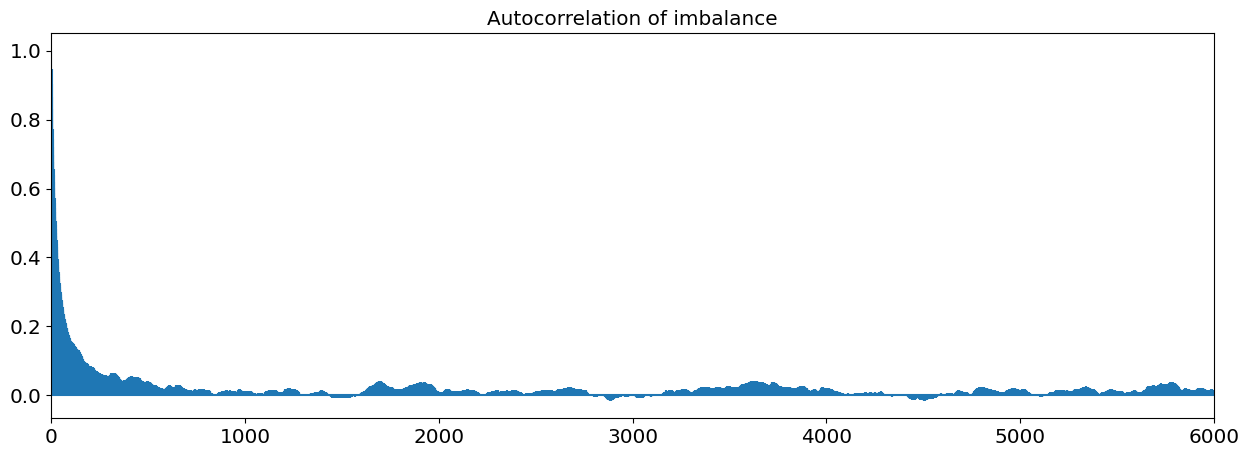

In [111]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

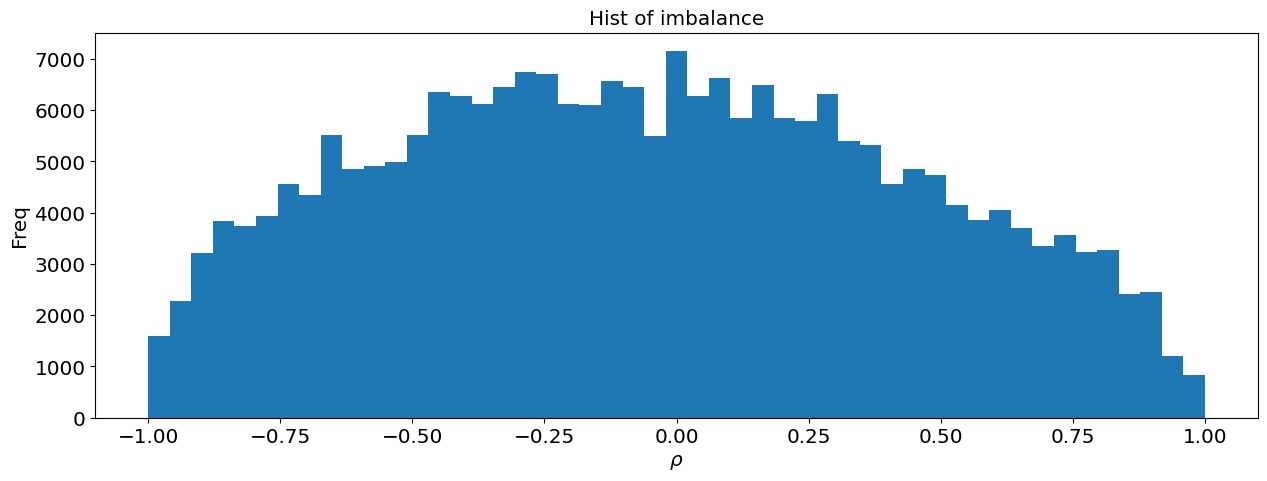

In [112]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

## Volume Imbalance at times of Market Orders

In [113]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])

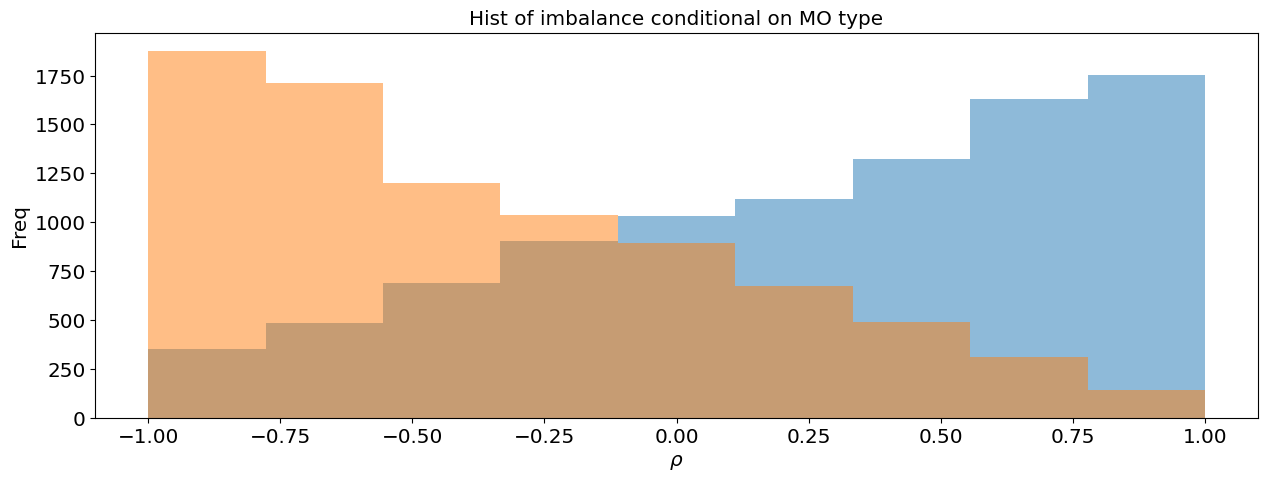

In [114]:
plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Hist of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

# Load Data

In [117]:
data = sio.loadmat('FTSE_sample.mat')

In [118]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

KeyError: 'LOB'

# 2.a Midprice Returns

In [ ]:
from scipy.io import loadmat

# Load the MATLAB file
data = loadmat('FTSE_sample.mat')

# Display the keys and structure of the loaded data to understand its format
data.keys(), {key: type(data[key]) for key in data.keys()}

In [ ]:
import numpy as np
import pandas as pd

# Extract the Best ask and Best bid prices from the data
best_ask = data['Bestask'].squeeze()
best_bid = data['Bestbid'].squeeze()

# Calculate the mid-price
mid_price = (best_ask + best_bid) / 2

# Calculate minutely returns. To do this, we need the percentage change of the mid-price.
# We assume the data is already in minutely frequency. If not, additional steps would be needed to resample the data.
minutely_returns = np.diff(mid_price) / mid_price[:-1]

# Convert minutely returns to a pandas series to easily calculate summary statistics
minutely_returns_series = pd.Series(minutely_returns)

# Report summary statistics
summary_statistics = minutely_returns_series.describe()

summary_statistics

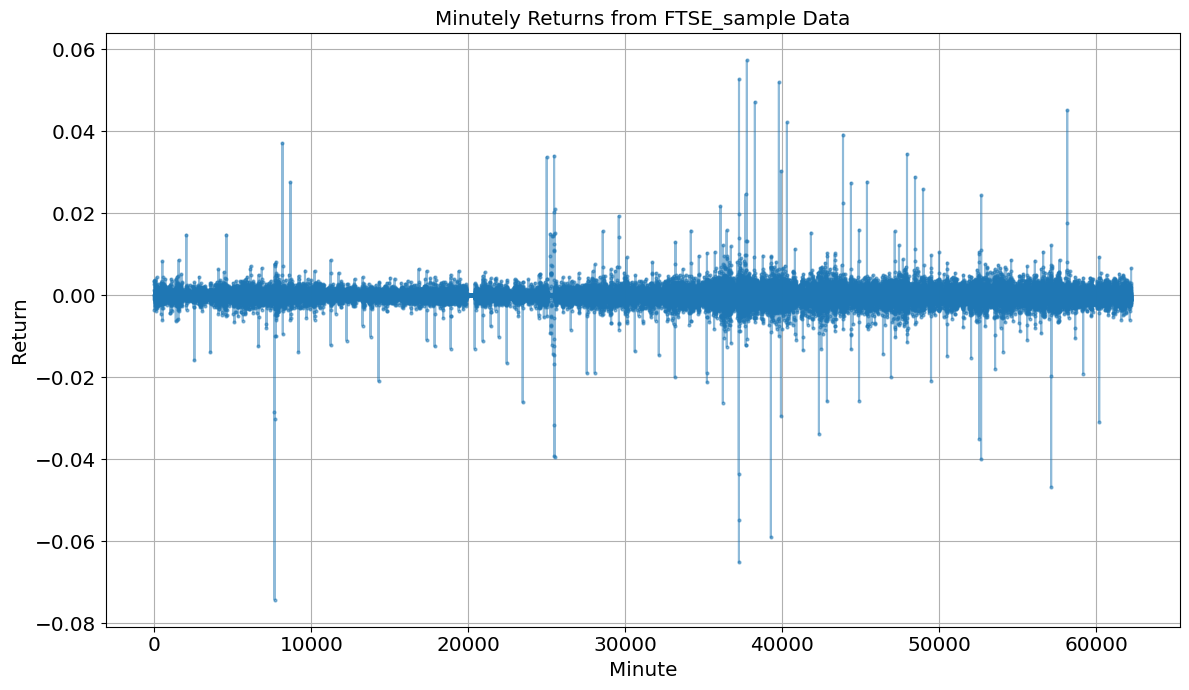

In [119]:
# Plotting the minutely returns from the actual FTSE_sample data
plt.figure(figsize=(12, 7))
plt.plot(minutely_returns, marker='o', linestyle='-', markersize=2, alpha=0.5)
plt.title('Minutely Returns from FTSE_sample Data')
plt.xlabel('Minute')
plt.ylabel('Return')
plt.grid(True)
plt.tight_layout()
plt.show()


## Autocorrelation Function

In [120]:
from scipy.io import loadmat

# Load the MATLAB file
data = loadmat('FTSE_sample.mat')

# Display the keys to understand the structure of the data
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Bestask', 'Bestbid', 'MO'])

In [121]:
# Examine the structure of the 'MO' data
mo_data = data['MO']

# Display the first few rows of the 'MO' data to understand its structure
mo_data[:5]

array([[  0.    ],
       [  4.1283],
       [ -2.8656],
       [  5.4553],
       [122.4072]])

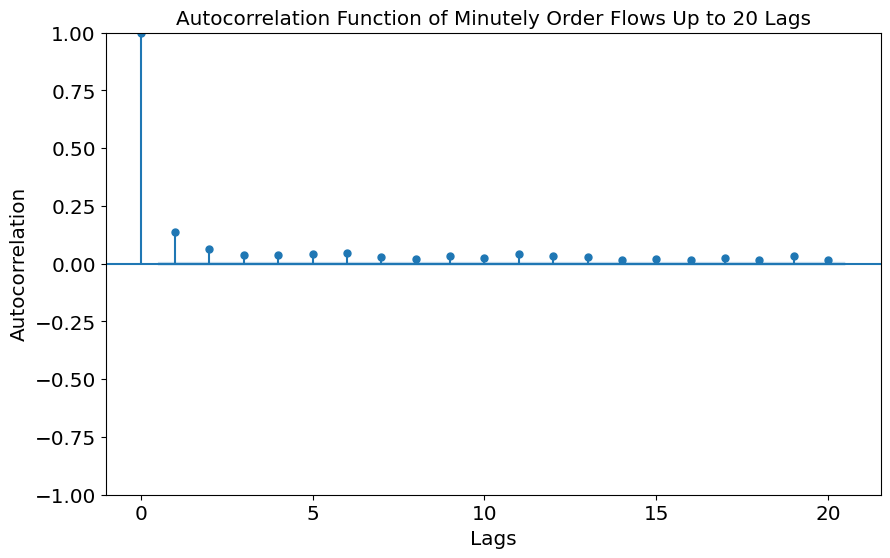

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Flatten the MO data array for analysis
mo_flattened = mo_data.flatten()

# Plot the autocorrelation function for up to 20 lags
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(mo_flattened, lags=20, ax=ax)
ax.set_title('Autocorrelation Function of Minutely Order Flows Up to 20 Lags')
ax.set_xlabel('Lags')
ax.set_ylabel('Autocorrelation')
plt.show()

## 2.c Regression

In [136]:
from scipy.io import loadmat

# Load the .mat file
data = loadmat('FTSE_sample.mat')

# Display the keys to understand the structure
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'Bestask', 'Bestbid', 'MO'])

In [137]:
import numpy as np
import pandas as pd

# Assuming Bestbid prices are relevant for calculating returns
prices = data['Bestbid'].flatten()

# Calculate minutely returns: Return_t = (Price_t - Price_{t-1}) / Price_{t-1}
# We use np.diff for the difference and then divide by prices shifted by 1 (excluding the first price)
minutely_returns = np.diff(prices) / prices[:-1]

# Calculate the return of the previous minute (lagged returns)
lagged_returns = np.roll(minutely_returns, 1)
# The first return doesn't have a previous return, so we set it to NaN or 0
lagged_returns[0] = np.nan

# Assuming MO represents the contemporaneous order flow
order_flow = data['MO'].flatten()[:-1]  # Aligning the size with minutely_returns and lagged_returns

# Creating a DataFrame for analysis
df = pd.DataFrame({
    'Minutely_Returns': minutely_returns,
    'Lagged_Returns': lagged_returns,
    'Order_Flow': order_flow
})

# Display the first few rows of the DataFrame
df.head()


,Minutely_Returns,Lagged_Returns,Order_Flow
0,-0.000671,NaN,0.0000
1,0.001678,-0.000671,4.1283
2,0.004020,0.001678,-2.8656
3,-0.001668,0.004020,5.4553
4,0.000334,-0.001668,122.4072


In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Remove the first row to avoid NaN values
df_clean = df.dropna()

# Define the independent variables (X) and the dependent variable (y)
X = df_clean[['Lagged_Returns', 'Order_Flow']]
y = df_clean['Minutely_Returns']

# Split the data into training and testing sets for validation purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate the Mean Squared Error (MSE) for the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

mse, coefficients, intercept


(5.960558432168996e-06,
 array([-1.68976327e-02,  2.30051011e-06]),
 3.588732582625732e-06)

# 2.d Trading Strategy

In [124]:
from scipy.io import loadmat

# Load the .mat file to see its contents
data = loadmat('FTSE_sample.mat')

# Display the keys and the structure of the data
data.keys(), {k: type(data[k]) for k in data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'Bestask', 'Bestbid', 'MO']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'Bestask': numpy.ndarray,
  'Bestbid': numpy.ndarray,
  'MO': numpy.ndarray})

In [125]:
# Examine the structure and content of the "MO" data
mo_data = data['MO']

# Display the shape of the MO data and a sample of its contents
mo_data_shape = mo_data.shape
mo_data_sample = mo_data[:5]  # Show the first 5 rows as a sample

mo_data_shape, mo_data_sample


((62220, 1),
 array([[  0.    ],
        [  4.1283],
        [ -2.8656],
        [  5.4553],
        [122.4072]]))

In [126]:
import numpy as np

# Calculate the rolling 30-minute cumulative sum of MO values
rolling_cumsum = np.convolve(mo_data.flatten(), np.ones(30), 'valid')

# Determine the trading signal (1 for buy, -1 for sell) based on the cumulative order flow
trading_signal = np.sign(rolling_cumsum)

# Calculate the daily return by multiplying the trading signal with the MO values
# To align the sizes for multiplication, we need to adjust the length of the trading signal array
adjusted_trading_signal = np.concatenate([np.zeros(29), trading_signal])  # Pad with zeros for the initial 29 minutes
daily_return = mo_data.flatten() * adjusted_trading_signal

# Calculate the cumulative return in percentage
cumulative_return_percent = np.sum(daily_return) / np.abs(mo_data).sum() * 100

cumulative_return_percent

30.654529832947002

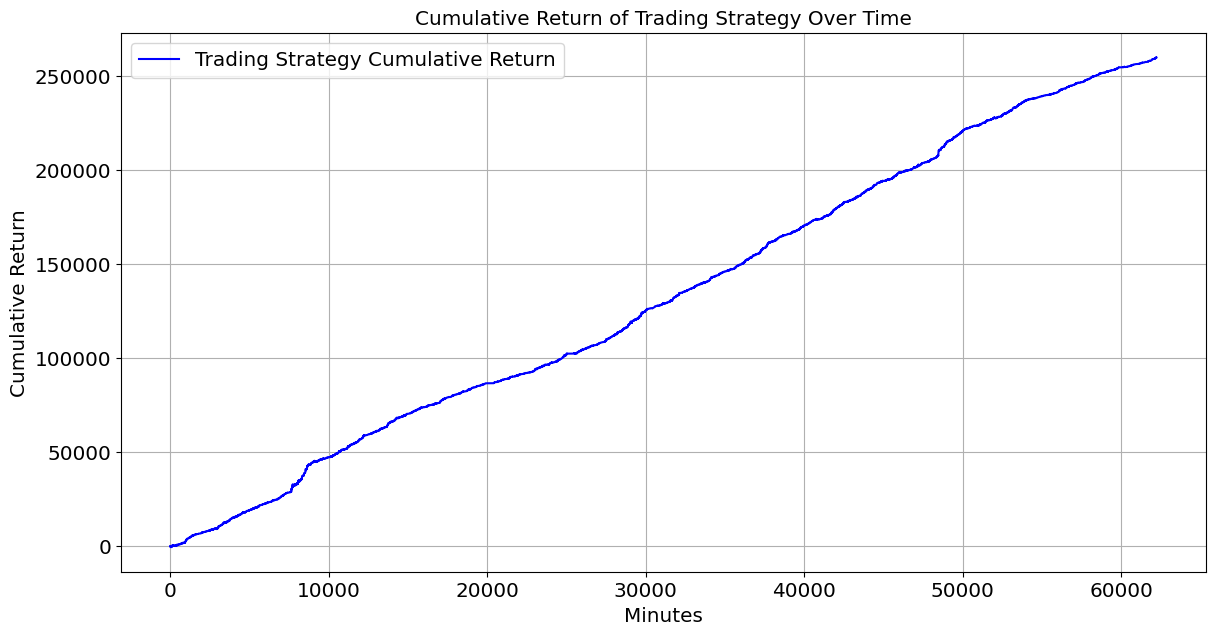

In [128]:
import matplotlib.pyplot as plt

# Calculate the cumulative return over time for the strategy
cumulative_return_over_time = np.cumsum(daily_return)

# Plot the cumulative return of the trading strategy over time
plt.figure(figsize=(14, 7))
plt.plot(cumulative_return_over_time, label='Trading Strategy Cumulative Return', color='blue')
plt.title('Cumulative Return of Trading Strategy Over Time')
plt.xlabel('Minutes')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


# 2.e Comparison of strategy to stock returns

In [127]:
# Extract the first and last values of Bestask and Bestbid to use as proxies for beginning and ending prices
first_bestask = data['Bestask'][0][0]
first_bestbid = data['Bestbid'][0][0]
last_bestask = data['Bestask'][-1][0]
last_bestbid = data['Bestbid'][-1][0]

# Calculate beginning and ending prices as the average of Bestask and Bestbid
beginning_price = (first_bestask + first_bestbid) / 2
ending_price = (last_bestask + last_bestbid) / 2

# Calculate the stock's return over the period
stock_return = (ending_price - beginning_price) / beginning_price
stock_return


-0.15061149271234708

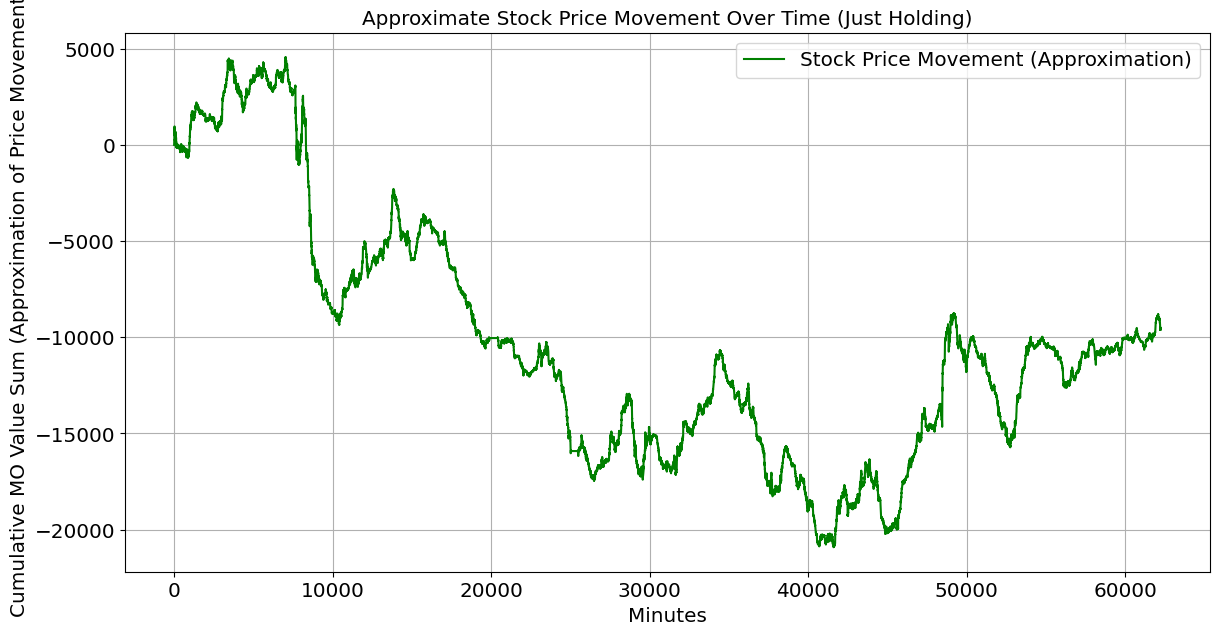

In [129]:
# Since we're simulating a "just holding" strategy for the stock, we'll calculate the cumulative sum of MO values as an approximation of stock price movement
stock_price_movement_approx = np.cumsum(mo_data.flatten())

# Plot the approximate stock price movement over time
plt.figure(figsize=(14, 7))
plt.plot(stock_price_movement_approx, label='Stock Price Movement (Approximation)', color='green')
plt.title('Approximate Stock Price Movement Over Time (Just Holding)')
plt.xlabel('Minutes')
plt.ylabel('Cumulative MO Value Sum (Approximation of Price Movement)')
plt.legend()
plt.grid(True)
plt.show()


# Q3

### a.

In [130]:
# Given proportion of informed traders
alpha = 0.3

# Calculate probabilities
P_Buy_VH = alpha * 1 + (1 - alpha) * 0.5
P_Buy_VL = (1 - alpha) * 0.5

P_Buy_VH, P_Buy_VL


(0.6499999999999999, 0.35)

### b.

In [131]:
# Calculate probabilities for selling
P_Sell_VH = (1 - alpha) * 0.5
P_Sell_VL = alpha * 1 + (1 - alpha) * 0.5

P_Sell_VH, P_Sell_VL


(0.35, 0.6499999999999999)

### c.

In [132]:
# Prior probabilities
p_VH = 0.5  # Assuming an equal chance for V=VH and V=VL for demonstration
p_VL = 1 - p_VH  # Complement of p_VH

# Total probability of receiving a buy order
P_Buy = P_Buy_VH * p_VH + P_Buy_VL * p_VL

# Applying Bayes' Theorem to calculate the posterior probabilities
P_VH_given_Buy = (P_Buy_VH * p_VH) / P_Buy
P_VL_given_Buy = (P_Buy_VL * p_VL) / P_Buy

P_VH_given_Buy, P_VL_given_Buy


(0.65, 0.35000000000000003)

### d. 

In [133]:
# Total probability of receiving a sell order
P_Sell = P_Sell_VH * p_VH + P_Sell_VL * p_VL

# Applying Bayes' Theorem for sell orders
P_VH_given_Sell = (P_Sell_VH * p_VH) / P_Sell
P_VL_given_Sell = (P_Sell_VL * p_VL) / P_Sell

P_VH_given_Sell, P_VL_given_Sell


(0.35000000000000003, 0.65)

### e.

In [134]:
# Values of VH and VL
VH = 100
VL = 50

# Calculating A using the expected value formula
A = P_VH_given_Buy * VH + P_VL_given_Buy * VL

A


82.5

### f.

In [135]:
# Calculating B using the expected value formula
B = P_VH_given_Sell * VH + P_VL_given_Sell * VL

B


67.5